In [2]:
import pandas as pd
import numpy as np
import difflib

In [3]:
tx = pd.read_csv('tx_2020.csv')
tx

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (16,18,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,raw_row_number,date,time,location,lat,lng,district,substation,subject_age,subject_race,...,vehicle_make,vehicle_model,vehicle_registration_state,vehicle_year,raw_race,raw_posted_speed,raw_actual_speed,raw_search_reason,raw_contraband_or_evidence,raw_custodial_arrest_made
0,796684|796685,2015-04-03,20:35:00,31 RUE CHARLES,29.517630,-98.434382,3360.0,NORTH,24.0,white,...,BMW,PDF,TX,2014.0,W,-,-,No Search,No,No
1,666360,2014-08-10,09:55:00,FRONTAGE RD 16,29.300506,-98.556879,6160.0,SOUTH,NaN,unknown,...,NaN,NaN,NaN,NaN,U,-,-,NaN,NaN,NaN
2,720016,2014-11-01,15:00:00,1900 DAKOTA,29.415899,-98.456741,4140.0,EAST,48.0,hispanic,...,NaN,NaN,NaN,NaN,H,-,-,NaN,NaN,NaN
3,542487,2014-02-14,20:24:00,5439 ENCANTA,29.544978,-98.389022,3210.0,NORTH,40.0,white,...,NaN,NaN,NaN,NaN,W,-,-,NaN,NaN,NaN
4,720818,2014-11-03,16:30:00,5530 HAVENCREST,29.366154,-98.604440,6350.0,SOUTH,44.0,hispanic,...,NaN,NaN,NaN,NaN,H,-,-,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040423,1353349,2018-04-10,06:05:00,0000100N LOOP 1604 E WB AC,29.608134,-98.499638,7240.0,PRUE,51.0,white,...,FORD,F150,TX,2012.0,W,--,--,NaN,NaN,NaN
1040424,1353350,2018-04-10,06:12:00,0000100N LOOP 1604 E WB AC,29.608134,-98.499638,7240.0,PRUE,51.0,white,...,GMC,PDF,TX,2012.0,W,--,--,NaN,NaN,NaN
1040425,257064|257065,2012-04-19,08:20:00,0000000 MAIN CIR,29.533250,-98.284225,NaN,NaN,39.0,black,...,BMW,PDF,TX,2012.0,B,-,-,NaN,NaN,NaN
1040426,257066,2012-04-24,13:51:00,0000500 BUTTON WILLOW CV,29.548124,-98.520485,3110.0,NORTH,30.0,white,...,TOY,TUND,TX,2002.0,W,--,--,NaN,NaN,NaN


In [4]:
tx = tx[tx['vehicle_make'].notna()]
tx['make_model'] = tx['vehicle_year'].astype(str) + ' ' + tx['vehicle_make'].astype(str) + ' ' + tx['vehicle_model'].astype(str)
tx['age'] = (tx['vehicle_year'] - 2022) *-1
tx['age'].value_counts().sort_values()

/tmp/ipykernel_99/2877331105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx['make_model'] = tx['vehicle_year'].astype(str) + ' ' + tx['vehicle_make'].astype(str) + ' ' + tx['vehicle_model'].astype(str)
/tmp/ipykernel_99/2877331105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx['age'] = (tx['vehicle_year'] - 2022) *-1


-7728.0        1
 69.0          1
-183.0         1
-88.0          1
 122.0         1
           ...  
 16.0      50284
 9.0       55198
 14.0      55363
 15.0      55908
 10.0      59011
Name: age, Length: 106, dtype: int64

In [5]:
tx = tx[tx['age']>= 0] 
tx = tx[tx['age'] <=30]

In [6]:
grouped = tx.groupby('age').count()
grouped['age'] = grouped.index
grouped

,raw_row_number,date,time,location,lat,lng,district,substation,subject_age,subject_race,...,vehicle_registration_state,vehicle_year,raw_race,raw_posted_speed,raw_actual_speed,raw_search_reason,raw_contraband_or_evidence,raw_custodial_arrest_made,make_model,age
age,,,,,,,,,,,,,,,,,,,,,
3.0,26,26,26,26,26,26,23,23,26,26,...,26,26,26,26,26,11,11,11,26,3.0
4.0,1221,1221,1221,1221,1220,1220,1133,1133,1221,1218,...,1215,1221,1218,1221,1221,117,117,115,1221,4.0
5.0,9178,9178,9178,9178,9170,9170,8368,8368,9177,9172,...,9138,9178,9172,9178,9178,652,651,648,9178,5.0
6.0,21090,21090,21090,21090,21052,21052,19374,19374,21090,21081,...,21002,21090,21081,21090,21090,1431,1429,1406,21090,6.0
7.0,35939,35939,35939,35939,35877,35877,32684,32684,35939,35932,...,35830,35939,35932,35939,35939,2801,2802,2766,35939,7.0
8.0,43981,43981,43981,43981,43821,43821,40021,40021,43981,43975,...,43842,43981,43975,43981,43981,4246,4248,4164,43981,8.0
9.0,55198,55198,55198,55198,54909,54909,49901,49901,55196,55186,...,55021,55198,55186,55198,55198,5762,5763,5628,55198,9.0
10.0,59011,59011,59011,59011,58875,58875,53691,53691,59010,59006,...,58824,59011,59007,59011,59011,6869,6874,6667,59011,10.0
11.0,48055,48055,48055,48055,48009,48009,43535,43535,48054,48051,...,47892,48055,48051,48055,48055,5642,5643,5457,48055,11.0


In [7]:
tx.groupby('subject_race').mean()

,lat,lng,district,subject_age,arrest_made,citation_issued,search_conducted,speed,posted_speed,vehicle_year,age
subject_race,,,,,,,,,,,
asian/pacific islander,29.492789,-98.491802,5012.503026,36.093951,0.001199,1.0,0.002398,67.755980,67.755980,2008.834005,13.165995
black,29.472975,-98.481716,4796.684244,34.534408,0.003182,1.0,0.014919,67.902828,67.902828,2006.988498,15.011502
hispanic,29.451767,-98.505013,4948.629761,34.697590,0.002400,1.0,0.008083,63.459307,63.459307,2006.597338,15.402662
other,29.474582,-98.502825,5075.638833,35.566290,0.001932,1.0,0.005995,65.032763,65.032763,2006.850879,15.149121
unknown,29.486253,-98.513743,4927.423231,32.174968,0.008816,1.0,0.020151,64.817844,64.817844,2006.732997,15.267003
white,29.477514,-98.493634,4915.531645,36.289773,0.002969,1.0,0.009305,68.201819,68.201819,2007.436072,14.563928


In [8]:
# group by age, scatter # of stops arrests searches
# service areas vs age


<AxesSubplot:xlabel='age', ylabel='raw_row_number'>

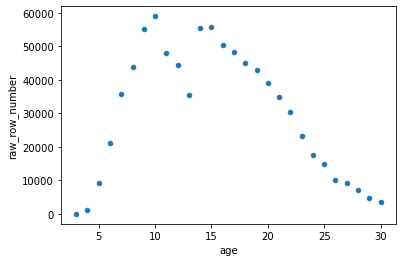

In [9]:
grouped.plot.scatter('age','raw_row_number')

In [10]:
cars2 = pd.read_csv('https://raw.githubusercontent.com/Tai-Pach/kbb/gh-pages/KBB_used_final_3.csv')


In [11]:
cars_join = pd.DataFrame()
cars_join['car'] = cars2['year'].astype(str) + ' ' +  cars2['make_model']
cars_join['price'] = cars2['price']
cars_join

,car,price
0,2015 Kia Sedona SX,28971.0
1,2007 Volkswagen Beetle Convertible w/ Triple W...,9975.0
2,2014 Cadillac CTS AWD Sedan,19833.0
3,1993 Chevrolet Corvette Coupe,5928.0
4,2006 Mazda MAZDA5 Touring,4999.0
...,...,...
17646,2011 GMC Sierra 1500 4x4 Crew Cab SLE,24995.0
17647,2016 Dodge Charger SXT,22339.0
17648,2010 Jeep Wrangler 4WD Rubicon,22999.0
17649,2015 Chevrolet Equinox AWD LT,22063.0


In [12]:
'2015 Kia Sedona SX'.split()

['2015', 'Kia', 'Sedona', 'SX']

In [13]:
def shorten(car):
    l = car.split()
    l[1] = l[1][:3]
    l[2] = l[2][:3]
    return ' '.join(l[:3])
cars_join['car'] = cars_join['car'].astype(str).apply(shorten)

In [14]:
cars_join

,car,price
0,2015 Kia Sed,28971.0
1,2007 Vol Bee,9975.0
2,2014 Cad CTS,19833.0
3,1993 Che Cor,5928.0
4,2006 Maz MAZ,4999.0
...,...,...
17646,2011 GMC Sie,24995.0
17647,2016 Dod Cha,22339.0
17648,2010 Jee Wra,22999.0
17649,2015 Che Equ,22063.0


In [15]:
difflib.get_close_matches(cars_join['car'][3], tx['make_model'])

['1993.0 CHEV C', '1993.0 CHEV C', '1993.0 CHEV C']

In [16]:
tx['id']= tx.index

In [17]:
tx_grouped = tx.groupby(tx['vehicle_year']).count()
tx_grouped.columns



Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'district',
       'substation', 'subject_age', 'subject_race', 'subject_sex', 'type',
       'violation', 'arrest_made', 'citation_issued', 'outcome',
       'contraband_found', 'search_conducted', 'search_basis', 'speed',
       'posted_speed', 'vehicle_color', 'vehicle_make', 'vehicle_model',
       'vehicle_registration_state', 'raw_race', 'raw_posted_speed',
       'raw_actual_speed', 'raw_search_reason', 'raw_contraband_or_evidence',
       'raw_custodial_arrest_made', 'make_model', 'age', 'id'],
      dtype='object')